## Pre Processing Data

In [206]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import numpy as np

In [207]:
DATA_PATH ="../data/spotify_songs.csv"
OUTPUT_PATH= "../data/processed_spotify_songs.csv"

In [208]:
df = pd.read_csv(DATA_PATH)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# Dataset description & assessment

This dataset contains data from Spotify from six main categories: Pop, EDM, Latin, R&B, Rap and Rock. The data includes numerous audio features that can be used to classify and describe songs such as acousticness, danceability, energy, instrumentalness, key, etc., as well as information about the song itself such as the name, album, artist and album release date. Each song includes a measure of popularity, which we are aiming to utilise to predict the most popular songs.

We can take a look at closer look at our dataset below:

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [210]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


# Dealing with empty values

We will start by checking for empty entries in the dataset and handling these cases.

In [211]:
print("Number of empty cells in each column:")
print(df.isna().sum())
print('\n')
nan_rows = df[df.isna().any(axis=1)]
print("The rows with empty values are:")
print(nan_rows)

Number of empty cells in each column:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


The rows with empty values are:
                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   


From the table above, we can see that there are 5 rows containing empty values out of the dataset of 32833 observations. We chose to drop these 5 rows to simplify our analysis given the large number of other observations. Before dropping these observations, we looked more closely at the data to ensure that there is no underlying pattern correlated with these missing values. These rows are missing values in the `track_name`, `track_artist` and `track_album_name` columns, and the `track_popularity` is 0 for all 5 of these rows, therefore we have reason to believe that dropping them will not affect the overall analysis.

Furthermore, these 5 rows have empty values for all 3 columns where there are empty values, and not sparse empty values throughout multiple rows and columns, which would have required more effort to deal with.

In [212]:
df = df.dropna()
print("Number of empty cells in each column:")
print(df.isna().sum())

Number of empty cells in each column:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


# Dealing with Duplicate Data

We will also check for duplicate entries in the dataset and handle these cases as duplicates will affect the importance of different song features in predicting its popularity.

In [213]:
print("Number of duplicates in the dataset:")
print(df.duplicated().sum())

Number of duplicates in the dataset:
0


We thus notice that there are no duplicate rows in the dataset. 

Despite there being no duplicate rows, there are 4476 duplicates of the `track_id` feature, which should be unique to each song, which we can see in the following two code chunks:

In [214]:
# subtracting dataframe without duplicated track_id from full dataframe
df_duplicated_track_id = df.drop_duplicates(subset=['track_id'])
print(f"Number of duplicated track ids: {len(df)} - {len(df_duplicated_track_id)} = {len(df) - len(df_duplicated_track_id)}")

Number of duplicated track ids: 32828 - 28352 = 4476


In [215]:
# including `track_name`, `track_artist` and `track_popularity` to ensure `track_id` is unique to each song
df_duplicated_track_id = df.drop_duplicates(subset=['track_id', 'track_name', 'track_artist', 'track_popularity'])
print(f"Number of duplicated track ids: {len(df)} - {len(df_duplicated_track_id)} = {len(df) - len(df_duplicated_track_id)}")

Number of duplicated track ids: 32828 - 28352 = 4476


When inspecting the data further, we notice that the duplicates with the same `track_ids` are either the same song listed under a different playlist, or the same songs listed under a different genre. 

To exercise caution when removing these duplicates, we decided to additionally consider songs with the same `track_name`, `track_artist` and `genre` alongside `track_id` given the importance of these three features when identifying a song. In this case, we chose not to consider the playlist name as that is not a key feature for song identification. 

To deal with the duplicates in the case where the `track_id`, `track_name`, `track_artist` and `genre` are the same, instead of randomly dropping one of the duplicates and losing the information it contained, we will create an additional entity keeping the identical features the same and the averaging the variables with different values. We will then keep this new value and remove both duplicate entries. For example, if we had a duplicate with different values for `track_popularity`, we would create a new value with all the information saved, and where `track_popularity` is the average of the duplicates. This way, we can keep the data as accurate as possible.

Where there are duplicate entries with different genres, we want to ensure that both listed genres are captured. Therefore, we will consolidate both entries into one resulting in one entry with a list of multiple genres. This approach allows us to capture all the information available as opposed to selecting one genre, as we cannot reasonably determine which genre is dominant for each song, or even whether having multiple genres will affect our prediction.

In [216]:
grouped = df.groupby(['track_id', 'track_name', 'track_artist'])
processed_songs = []
features_to_average = ['track_popularity', 'key', 'loudness', 'danceability', 'energy', 'speechiness',
                           'acousticness', 'instrumentalness', 'liveness', 'valence']

for key, group in grouped:
    # If only one song in the group, no duplicates, so add it as-is
    if len(group) == 1:
        processed_songs.append(group)
    else:
        # Handle duplicates based on genre and subgenre of the playlist with the track
        unique_genres = group['playlist_genre'].unique()
        unique_subgenres = group['playlist_subgenre'].unique()
        
        if len(unique_genres) > 1:
            # Combine genres into a list
            combined_genre = ', '.join(unique_genres)
            group['playlist_genre'] = combined_genre

        if len(unique_subgenres) > 1:
            # Combine subgenres into a list
            combined_subgenre = ', '.join(unique_subgenres)
            group['playlist_subgenre'] = combined_subgenre
        

        new_song = group.iloc[0].copy()
        avg_features = group[features_to_average].mean()
        for feature in features_to_average:
                new_song[feature] = avg_features[feature]
        
        processed_songs.append(pd.DataFrame([new_song]))

final_df = pd.concat(processed_songs, ignore_index=True)
final_df = final_df.drop_duplicates(subset=['track_id', 'track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre'], keep='first')

print(f"Count of original rows - count after handling duplicates = {len(df)} - {len(final_df)} = {len(df) - len(final_df)}")

Count of original rows - count after handling duplicates = 32828 - 28352 = 4476


In [217]:
df = final_df
print(df['playlist_genre'].value_counts())

playlist_genre
rap                           4994
edm                           4877
r&b                           4449
rock                          4264
pop                           4102
latin                         3980
pop, edm                       274
pop, r&b                       217
pop, latin                     180
rap, r&b                       147
rap, latin                     147
pop, rock                      107
latin, edm                      93
rap, edm                        61
r&b, edm                        55
latin, r&b                      45
pop, latin, edm                 43
pop, latin, r&b, edm            42
pop, latin, r&b                 39
rock, r&b                       35
pop, rap                        33
pop, r&b, edm                   27
rap, rock                       22
latin, r&b, edm                 18
pop, rap, r&b                   12
pop, rap, edm                   11
pop, rap, latin                 11
rap, latin, r&b                 10
rap, 

In [218]:
print(df['playlist_subgenre'].value_counts())

playlist_subgenre
neo soul                                               1478
progressive electro house                              1460
indie poptimism                                        1419
southern hip hop                                       1413
gangster rap                                           1249
                                                       ... 
electropop, classic rock, permanent wave                  1
post-teen pop, hip hop                                    1
hip hop, urban contemporary, hip pop, pop edm             1
dance pop, tropical, hip pop, big room, pop edm           1
hip hop, southern hip hop, trap, latin pop, hip pop       1
Name: count, Length: 553, dtype: int64


As we can see from the output above and the resulting plots below, there are significant differences between the counts of some genres and subgenres, and others. We decided to investigate this imbalance in the data further.

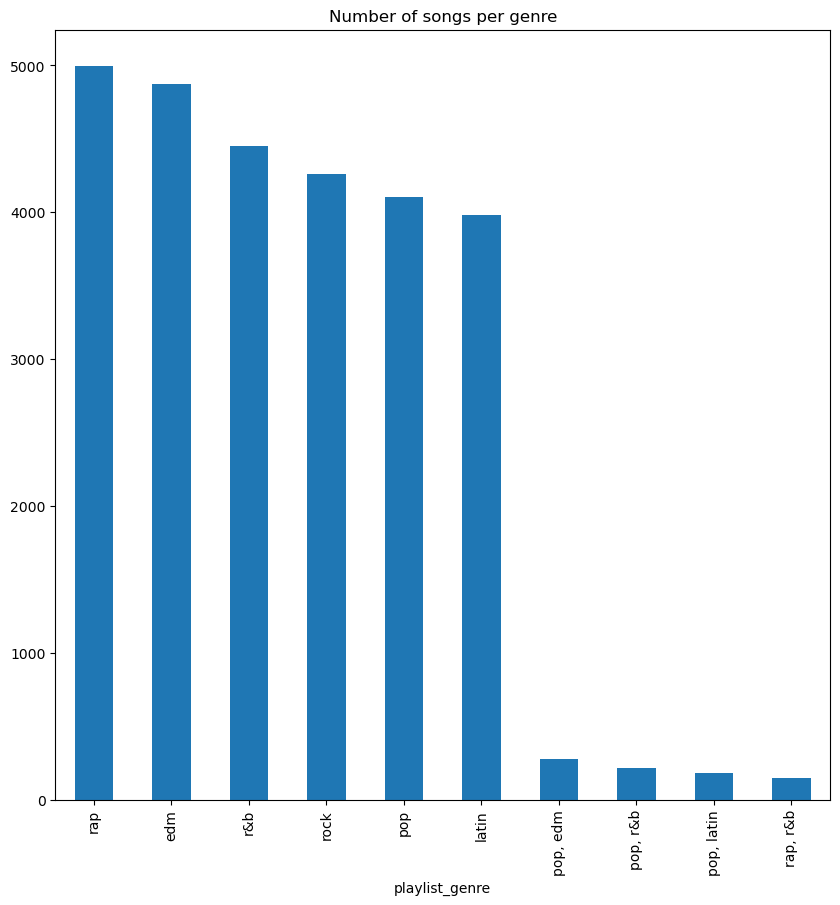

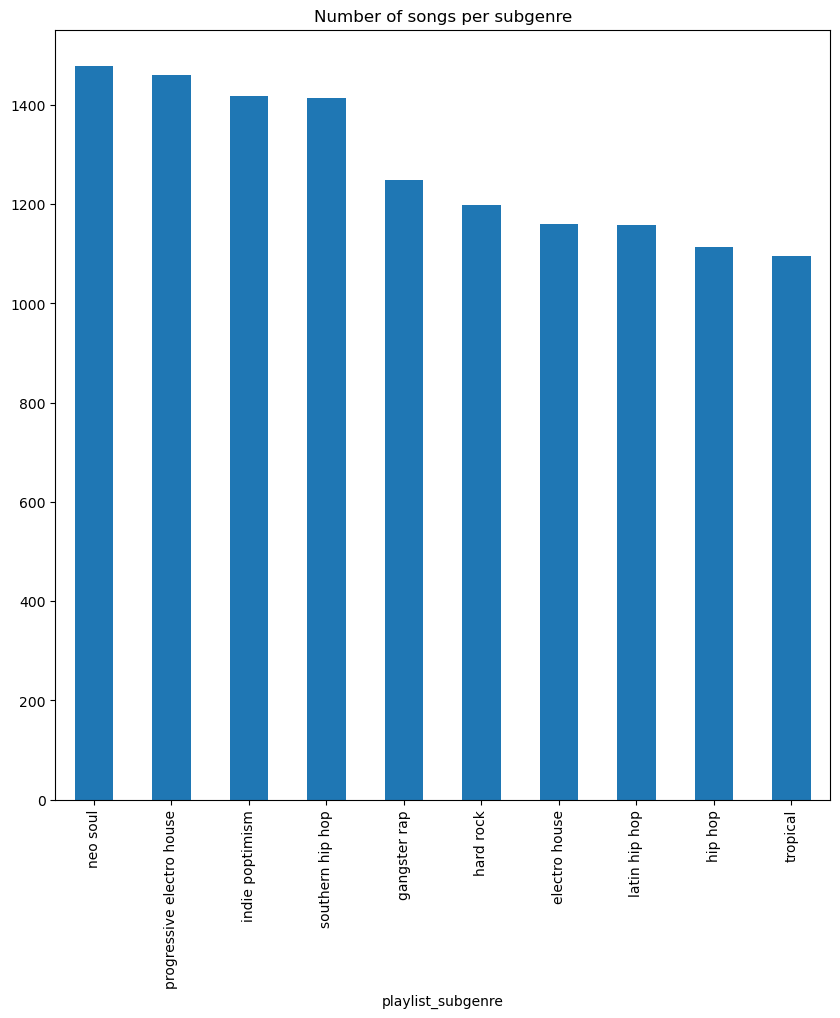

In [219]:
fig = plt.figure(figsize=(10, 10))
# playlist_genre_normalized = df['playlist_genre'].value_counts(normalize=True)
# ten_first_genres = playlist_genre_normalized.head(10)
ten_first_genres = df['playlist_genre'].value_counts().head(10)
ten_first_genres.plot(kind='bar')
plt.title('Number of songs per genre')
plt.show()

fig = plt.figure(figsize=(10, 10))
# playlist_subgenre_normalized = df['playlist_subgenre'].value_counts(normalize=True)
# ten_first_subgenres = playlist_subgenre_normalized.head(10)
ten_first_subgenres = df['playlist_subgenre'].value_counts().head(10)
ten_first_subgenres.plot(kind='bar')
plt.title('Number of songs per subgenre')
plt.show()

In [220]:
unique_values = df["playlist_genre"].unique()

# Display the unique values
print(unique_values)

['rock' 'r&b' 'pop' 'latin' 'edm' 'rap, r&b, edm' 'rap' 'pop, rock'
 'pop, latin' 'pop, r&b' 'pop, rap, r&b' 'pop, edm' 'rap, r&b'
 'pop, latin, edm' 'pop, rock, latin' 'latin, r&b' 'pop, latin, r&b'
 'rock, r&b' 'rap, latin' 'r&b, edm' 'pop, latin, r&b, edm' 'rap, edm'
 'latin, edm' 'pop, rap' 'latin, r&b, edm' 'pop, rap, edm' 'pop, r&b, edm'
 'pop, rock, r&b' 'rap, rock' 'rap, latin, r&b' 'pop, rap, latin'
 'rap, latin, r&b, edm' 'pop, rap, rock' 'pop, rap, latin, edm'
 'pop, rock, edm' 'pop, rock, latin, r&b, edm' 'pop, rap, latin, r&b'
 'rock, latin' 'rock, latin, r&b' 'pop, rock, latin, r&b'
 'pop, rap, latin, r&b, edm' 'rock, edm' 'pop, rap, r&b, edm'
 'rap, latin, edm']


It appears that there are big differences between the count of songs in different genres and subgenres. Given the number of potential subgenres, it hard to combine subgenres and level out this imbalance. That said, we note that there are only six listed genres, with additional groups containing songs that may fall in to two or more of these orignal genres. 

To account for this imbalance, we will use one hot encoding. This will allow us to encode a song's membership in multiple groups without creating new groups for each combination. For example, for a Latin pop song, it will have membership = 1 for both latin and pop genres, but 0 for the remaining genres. This encoding will be carried out below in the portion of the notebook where we deal with categorical variables.

### Selecting columns for analysis

In [221]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Now that we have dealt with empty values, we can take a look at the columns in our dataframe in conjunction with our objective, which is to predict a song's popularity. Not all these columns are necessary for prediction, in particular `track_id` which is a unique identifier for each song and `track_name`. We do not want the model to assign importance to a song's identifier or name for prediction, so we will drop these columns.

Furthermore, the `track_album_name` and `track_album_id` columns contain the same information, so it is not necessary to keep both. We will remove `track_album_name` as several albums could contain the same name, but `track_album_id` is a unique identifier. We keep `track_album_id` as a popular album may potentially increase the popularity of a song that would not be as popular otherwise. Similarly, for `playlist_name` and `playlist_id`, we will drop `playlist_name`.

In [222]:
## Drop columns as specified above

df = df.drop(
    ["track_id", "track_name", "track_album_name", "playlist_name"],
    axis=1,
    )

### Correcting skewness

We next check if our data contains any skewnesses which we would want to address in case we use a linear model in our analysis. In the case that we do not end up using a linear model, we will remove this part.

In [223]:
# separating categorical and numerical features
categorical_feat = []
numerical_feat = []
for col in df.columns:
    if df[col].dtype == "object":
        categorical_feat.append(col)
    else:
        numerical_feat.append(col)

In [224]:
numeric_df = df.select_dtypes(include=[np.number])
skewness = numeric_df.skew().sort_values(ascending=False)
print("Skewness of the features:\n", skewness)

Skewness of the features:
 instrumentalness    2.624728
liveness            2.081680
speechiness         1.965620
acousticness        1.576504
duration_ms         1.115201
tempo               0.513893
valence            -0.007267
key                -0.020125
track_popularity   -0.231526
mode               -0.264428
danceability       -0.505789
energy             -0.645312
loudness           -1.359165
dtype: float64


In [225]:
skew_df = pd.DataFrame(columns=["feature", "before", "after"])

In [226]:
def remove_skewness(feature, df):
    skew = df[feature].skew()
    row = [feature, skew, 0]

    # defining multiple transformations
    transformers = [
        np.log1p,
        np.sqrt,
        np.square,
        lambda x: np.cbrt(x),  
    ]

    # handling negative values if present
    if df[feature].min() < 0:
        df[feature] = df[feature] - df[feature].min() + 1

    # transformation initialization
    best_transform = df[feature]
    best_skew = skew

    # try each transformation
    for transformer in transformers:
        try:
            transformed = transformer(df[feature])
            new_skew = transformed.skew()
            if abs(new_skew) < abs(best_skew):
                best_skew = new_skew
                best_transform = transformed
        except Exception as e:
            print(f"Transformation {transformer} failed for {feature}: {e}")
            continue

    row[2] = best_skew
    skew_df.loc[len(skew_df)] = row
    return best_transform

In [227]:
skew_threshold = 0.5
skewed_features = [
    feat for feat in numerical_feat if abs(df[feat].skew()) >= skew_threshold
]

for feat in skewed_features:
    df[feat] = remove_skewness(feat, df)

In [228]:
skew_df

,feature,before,after
0,danceability,-0.505789,0.072913
1,energy,-0.645312,-0.050061
2,loudness,-1.359165,-0.897860
3,speechiness,1.965620,1.041240
4,acousticness,1.576504,0.250603
5,instrumentalness,2.624728,1.757275
6,liveness,2.081680,0.920033
7,tempo,0.513893,0.049342
8,duration_ms,1.115201,0.261798


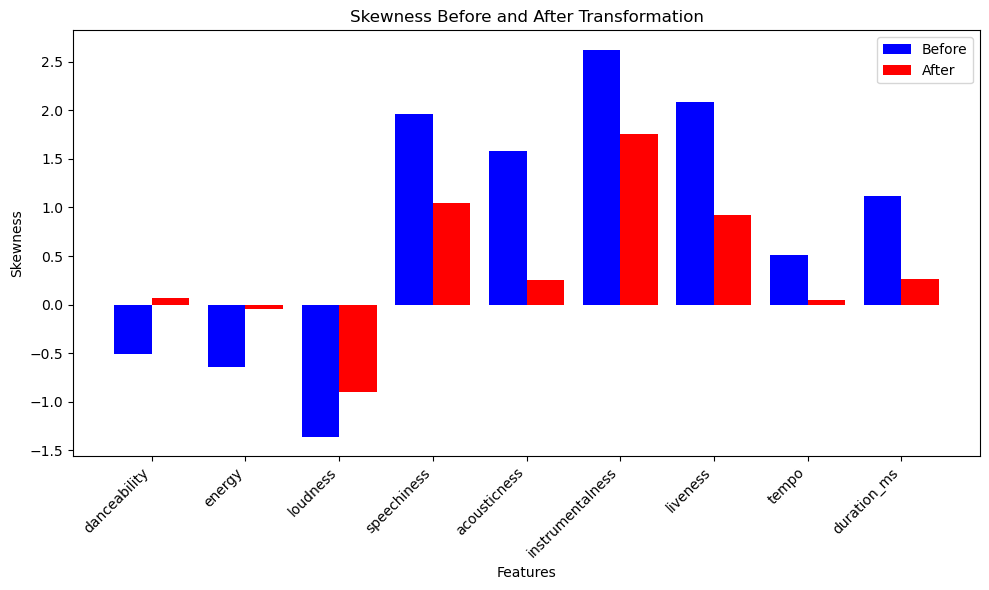

In [229]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(
    index, skew_df["before"], bar_width, label="Before", color="blue"
)
bars_after = ax.bar(
    [i + bar_width for i in index],
    skew_df["after"],
    bar_width,
    label="After",
    color="red",
)
ax.set_xlabel("Features")
ax.set_ylabel("Skewness")
ax.set_title("Skewness Before and After Transformation")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df["feature"], rotation=45, ha="right")
ax.legend()
plt.tight_layout()
plt.show()

The skewness for most features has been successfully reduced after transformation, although a few features still show moderate skewness (loudness, speechiness and instrumentalness).

### Normalizing the data

The next step is to normalize the continuous variables, as they are measured on different scales. Normalization ensures that no feature disproportionately influences the model due to its magnitude. This process ensures that small changes in large-value variables don't skew predictions and that changes in small-value variables are appropriately accounted for. By bringing all features to a similar scale, we make the model more robust and accurate.

Note: We choose to normalize our data for now, but may choose to additionally standardize some features in the future depending on the model that we use.

In [230]:
scaler = MinMaxScaler()

columns_to_normalize = ["loudness", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000
mean,39.335320,0.463788,0.521398,5.367417,0.699150,0.565533,0.453648,0.449806,0.175032,0.544491,0.515021,4.918515,60.497828
std,23.699443,0.188308,0.238359,3.613743,0.099062,0.495696,0.127350,0.248615,0.289067,0.131413,0.236472,0.365223,5.308430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.874011
25%,21.000000,0.325701,0.335241,2.000000,0.645094,0.000000,0.354797,0.243211,0.000000,0.453020,0.331988,4.641156,57.260249
50%,42.000000,0.464561,0.521284,6.000000,0.714462,1.000000,0.408549,0.431212,0.027490,0.503325,0.516650,4.959588,60.086265
75%,58.000000,0.597751,0.710649,9.000000,0.769362,1.000000,0.525214,0.639532,0.187693,0.629961,0.701312,5.117217,63.411205
max,100.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.209628,80.301467


### Checking for correlation

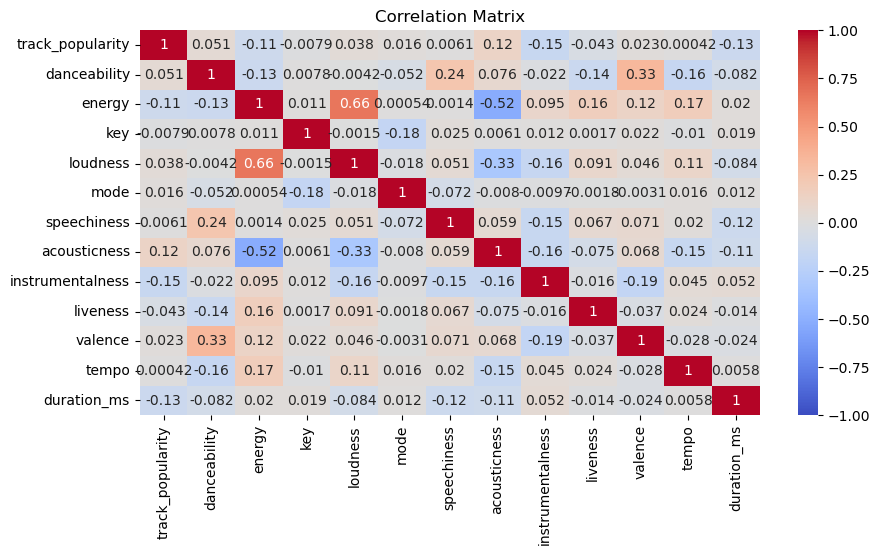

In [231]:
# Calculate the correlation matrix
numeric_df = df.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

From the matrix above, we observe a correlation between energy and loudness, which seems logical. Acousticness and energy also appear to be negatively correlated, which also makes sense as acoustic songs tend to be more "laid back".

# Dealing with non-numerical data

## One hot encoding the playlist genre

We will start by one hot encoding the `playlist_genre`, as this is a non-numerical column in the dataset. We will then drop the original column and add the one hot encoded column to the dataset. For data where the `playlist_genre` is an aggregation of multiple genres resulting from the duplicates preprocessing, the vectors will simply have 1's in all the categories that are present in the genre list (i.e. the vectors aren't necessarily zeros with a single 1 entry).

Note: We notice that some subgenres overlap with genres, which can thus get confusing in the dataset if we also one-hot encode the `playlist_subgenre`. Furthermore, some subgenres are also composed of multiple subgenres in a different manner as the concatenation we did in the previous preprocessing, which pose a new syntax challenge. For simplicity, we thus decided to not one-hot encode the `playlist_subgenre` for now, and hypothesize that the playlist genre will be of sufficient influence in the prediction to keep the subgenre as is. The code for the one-hot encoding of the `playlist_subgenre` is still present in the code below, but commented out.

In [232]:
df['playlist_genre_split'] = df['playlist_genre'].apply(lambda x: x.split(', '))

all_genres = set([genre for sublist in df['playlist_genre_split'] for genre in sublist])
for genre in all_genres:
    df[genre] = df['playlist_genre_split'].apply(lambda x: x.count(genre))

df = df.drop('playlist_genre', axis=1)
df = df.drop('playlist_genre_split', axis=1)

# df['playlist_subgenre_split'] = df['playlist_subgenre'].apply(lambda x: x.split(', '))

# all_subgenres = set([subgenre for sublist in df['playlist_subgenre_split'] for subgenre in sublist])
# for subgenre in all_subgenres:
#     df[subgenre] = df['playlist_subgenre_split'].apply(lambda x: x.count(subgenre))

# df = df.drop('playlist_subgenre_split', axis=1)
# df = df.drop('playlist_subgenre', axis=1)

In the following printed data, we can see that the `playlist_genre` has been one-hot encoded with data entries possibly having multiple 1's in the vector for playlist genre. 

In [233]:
print(df.iloc[21:31, 23:29])

    pop
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
30    1


## Target encoding the track artist name, the playlist id and the album's id

Let us now apply **target encoding** to the `track_artist` column based on the average `track_popularity` for each artist. This will allow us to encode the `track_artist` column to represent the average popularity of each artist's tracks, which can be useful to provide here an equivalent of a numerical encoding of artist popularity.

In [234]:
# Step 1: Calculate the mean target value for each 'track_artist'
mean_encoded_artist_track = df.groupby("track_artist")["track_popularity"].mean()

# Step 2: Map the mean target value back to the original DataFrame
df["artist_track_encoded"] = df["track_artist"].map(mean_encoded_artist_track)

# Display the updated DataFrame with the new encoded column
print(df[["track_artist", "artist_track_encoded"]].head())

         track_artist  artist_track_encoded
0     Barbie's Cradle                  43.5
1                RIKA                  15.0
2       Steady Rollin                  29.5
3  The.madpix.project                  12.2
4         YOSA & TAAR                  38.0


We do the same thing for the `playlist_id` column.

In [235]:
mean_encoded_playlist = df.groupby("playlist_id")["track_popularity"].mean()
df["playlist_id_encoded"] = df["playlist_id"].map(mean_encoded_playlist)
print(df[["playlist_id", "playlist_id_encoded"]].head())

              playlist_id  playlist_id_encoded
0  37i9dQZF1DWYDQ8wBxd7xt            43.100000
1  0JmBB9HfrzDiZoPVRdv8ns            26.206186
2  3YouF0u7waJnolytf9JCXf            31.697917
3  5TiiHps0hNCyQ6ijVkNZQs            39.436364
4  37i9dQZF1DXdOtZGKonFlM            35.673469


We do the same thing for the `track_album_name` columns.

In [236]:
mean_encoded_album = df.groupby("track_album_id")["track_popularity"].mean()
df["track_album_id_encoded"] = df["track_album_id"].map(mean_encoded_album)
print(df[["track_album_id", "track_album_id_encoded"]].head())

           track_album_id  track_album_id_encoded
0  1srJQ0njEQgd8w4XSqI4JQ                    41.0
1  1ficfUnZMaY1QkNp15Slzm                    15.0
2  3z04Lb9Dsilqw68SHt6jLB                    28.0
3  1Z4ANBVuhTlS6DprlP0m1q                    24.0
4  2BuYm9UcKvI0ydXs5JKwt0                    38.0


## Converting the track album release date to a numerical value

Let us now convert the `track_album_release_date` column into a proper datetime format using `pd.to_datetime()`, extracting the year, month, and day components into separate columns: `release_year`, `release_month`, and `release_day`, respectively. These new columns allow for easier analysis based on the album release date, which can be useful for time-based trends or patterns in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import random

def transform_date(date):
    if len(date) == 4:  # Case "YYYY"
        random_month = f"{random.randint(1, 12):02d}"
        random_day = f"{random.randint(1, 28):02d}" 
        return f"{date}-{random_month}-{random_day}"
    elif len(date) == 7:  # Case "YYYY-MM"
        random_day = f"{random.randint(1, 28):02d}"  
        return f"{date}-{random_day}"
    return date  

df["track_album_release_date"] = df["track_album_release_date"].apply(transform_date)


df["track_album_release_date"] = pd.to_datetime(df["track_album_release_date"], errors="coerce")


df["release_year"] = df["track_album_release_date"].dt.year
df["release_month"] = df["track_album_release_date"].dt.month
df["release_day"] = df["track_album_release_date"].dt.day


**Save pre-processed data in a new csv file**

In [239]:
# save pre-processed data to a CSV file
df.to_csv(OUTPUT_PATH, index=False)